<a href="https://colab.research.google.com/github/WilliamAshbee/splineexample/blob/main/Sergey_bootcamp_randomsynthetic_circle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

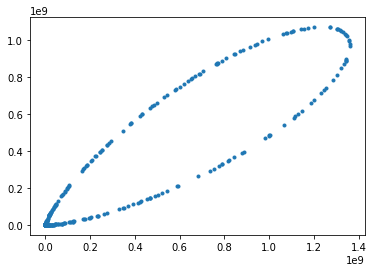

In [1]:
from scipy.special import spherical_jn as besseli
import numpy as np
from scipy import *
from math import *
import matplotlib.pyplot as plt

def vmf(mu, kappa, x):
    # single point function
    d = mu.shape[0]
    # compute in the log space
    logvmf = (d//2-1) * np.log(kappa) - np.log((2*pi)**(d/2)*besseli(d//2-1,kappa)) + kappa * np.dot(mu,x)
    return np.exp(logvmf)

def pol2cart(r, phi):
    x = r*np.cos(phi)
    y = r*np.sin(phi)
    return np.array([x,y])
    
def cart2pol(x,y):
    th = atan2(y,x)
    r = sqrt(x**2+y**2)
    return th,r


def apply_vmf(x, mu, kappa):
    y = []
    for i in range(x.shape[1]):
        phi, rho = cart2pol(x[0,i], x[1,i])
        delta = vmf(mu, kappa, x[:,i])
        xi, yi = pol2cart(rho+delta, phi)
        y.append(np.array([xi,yi]).T)
    return np.asarray(y).T


x = np.random.randn(2,1000)
xnormed = x/np.linalg.norm(x, axis=0)
mu = np.random.randn(2); mu = mu/np.linalg.norm(mu)
y = apply_vmf(xnormed, mu, 20)
plt.plot(y[0,:], y[1,:], '.')


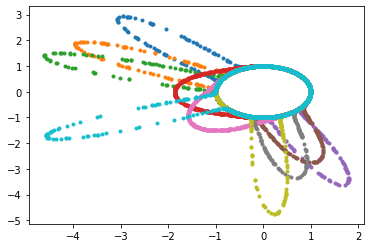

In [2]:
from scipy.special import iv as besseli
import matplotlib.pyplot as plt
import numpy as np
from scipy import *
from math import *

def vmf(mu, kappa, x):
    # single point function
    d = mu.shape[0]
    # compute in the log space
    logvmf = (d//2-1) * np.log(kappa) - np.log((2*pi)**(d/2)*besseli(d//2-1,kappa)) + kappa * np.dot(mu,x)
    return np.exp(logvmf)

def pol2cart(r, phi):
    x = r*np.cos(phi)
    y = r*np.sin(phi)
    return np.array([x,y])

def cart2pol(x,y):
    th = atan2(y,x)
    r = sqrt(x**2+y**2)
    return th,r

def apply_vmf(x, mu, kappa, norm=1.0):
    y = []
    for i in range(x.shape[1]):
        phi, rho = cart2pol(x[0,i], x[1,i])
        delta = vmf(mu, kappa, x[:,i])
        xi, yi = pol2cart(rho+delta, phi)
        y.append(np.array([xi,yi]).T/norm)
    return np.asarray(y).T

plt.clf()
for i in range(10):
    x = np.random.randn(2,1000)
    xnormed = x/np.linalg.norm(x, axis=0)

    kappa = np.random.randint(5, 100)
    mu = np.random.randn(2); mu = mu/np.linalg.norm(mu)
    y = apply_vmf(xnormed, mu, kappa)
    plt.plot(y[0,:], y[1,:], '.')

(-6.236356376403475, 3.3930552912182805, -6.121711790028731, 6.259393789155325)

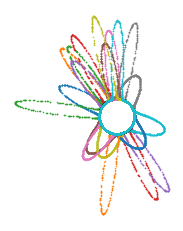

In [3]:
plt.clf()
x = np.random.randn(2,3000)
xnormed = x/np.linalg.norm(x, axis=0)
for i in range(20):
    kappa = np.random.randint(0, 150)
    mu = np.random.randn(2); mu = mu/np.linalg.norm(mu)
    y = apply_vmf(xnormed, mu, kappa)
    plt.plot(y[0,:], y[1,:], '.', ms=1)
plt.gca().set_aspect(1)
plt.axis('off')

In [4]:
def apply_vmf(x, mu, kappa, norm=5.0):
    y = []
    for i in range(x.shape[1]):
        phi, rho = cart2pol(x[0,i], x[1,i])
        delta = vmf(mu, kappa, x[:,i])
        xi, yi = pol2cart(rho+delta/norm, phi)
        y.append(np.array([xi,yi]).T)
    return np.asarray(y).T

(-2.0655306045933797,
 1.8876416495693917,
 -1.668631031279786,
 1.9165519617181725)

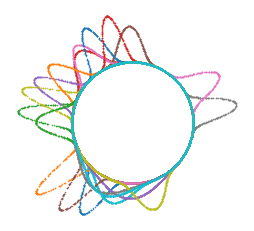

In [5]:
plt.clf()
x = np.random.randn(2,3000)
xnormed = x/np.linalg.norm(x, axis=0)
for i in range(20):
    kappa = np.random.randint(0, 150)
    mu = np.random.randn(2); mu = mu/np.linalg.norm(mu)
    y = apply_vmf(xnormed, mu, kappa)
    plt.plot(y[0,:], y[1,:], '.', ms=1)
plt.gca().set_aspect(1)
plt.axis('off')

(-1.0999997964620374,
 1.0999976337783268,
 -2.0038112404045356,
 1.1430363528812755)

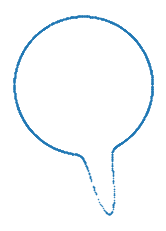

In [6]:
plt.clf()
x = np.random.randn(2,3000)
xnormed = x/np.linalg.norm(x, axis=0)
for i in range(1):
    kappa = np.random.randint(0, 150)
    mu = np.random.randn(2); mu = mu/np.linalg.norm(mu)
    y = apply_vmf(xnormed, mu, kappa)
    plt.plot(y[0,:], y[1,:], '.', ms=1)
plt.gca().set_aspect(1)
plt.axis('off')

In [7]:
def apply_vmf(x, mu, kappa, norm=5.0):
    print('mu',mu,type(mu))
    y = []
    for i in range(x.shape[1]):
        phi, rho = cart2pol(x[0,i], x[1,i])
        delta = vmf(mu, kappa, x[:,i])
        xi, yi = pol2cart(rho+delta/norm, phi)
        y.append(np.array([xi,yi]).T)
    return np.asarray(y).T

mu [-1.  0.] <class 'numpy.ndarray'>
mu [-1.  0.] <class 'numpy.ndarray'>
mu [-1.  0.] <class 'numpy.ndarray'>
mu [-1.  0.] <class 'numpy.ndarray'>
mu [-1.  0.] <class 'numpy.ndarray'>
mu [-1.  0.] <class 'numpy.ndarray'>
mu [-1.  0.] <class 'numpy.ndarray'>
mu [-1.  0.] <class 'numpy.ndarray'>
mu [-1.  0.] <class 'numpy.ndarray'>
mu [-1.  0.] <class 'numpy.ndarray'>


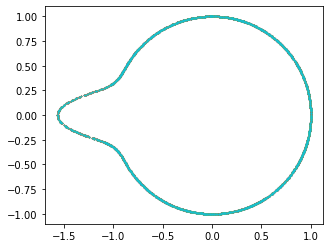

In [8]:
plt.clf()
x = np.random.randn(2,3000)
xnormed = x/np.linalg.norm(x, axis=0)
for i in range(10):
    kappa = np.random.randint(0, 150)
    mu = np.random.randn(2); mu = mu/np.linalg.norm(mu)
    kappa = 50
    mu = np.array([-1.0,0.0])
    y = apply_vmf(xnormed, mu, kappa)
    plt.plot(y[0,:], y[1,:], '.', ms=1)
plt.gca().set_aspect(1)
#plt.axis('off')

(2, 2000)
(2, 2000)
(2, 2000)
(2, 2000)
(2, 2000)
(2, 2000)
(2, 2000)
(2, 2000)
(2, 2000)
(2, 2000)


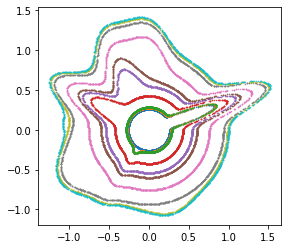

In [9]:
from scipy.special import iv as besseli
import pylab as plt
import numpy as np

def vmf(mu, kappa, x):
    # single point function
    d = mu.shape[0]
    # compute in the log space
    logvmf = (d//2-1) * np.log(kappa) - np.log((2*np.pi)**(d/2)*besseli(d//2-1,kappa)) + kappa * np.dot(mu,x)
    return np.exp(logvmf)

def apply_vmf(x, mu, kappa, norm=1.0):
    delta = 1.0+vmf(mu, kappa, x)
    y = x * np.c_[delta,delta].T
    return y


plt.clf()
w = np.random.rand(11)
w = w/np.sum(w)
x = np.random.randn(2,2000)
xnormed = x/np.linalg.norm(x, axis=0)
xx = xnormed.copy()*w[0]
for i in range(10):
    kappa = np.random.randint(5, 100)
    mu = np.random.randn(2); mu = mu/np.linalg.norm(mu)
    y = apply_vmf(xnormed, mu, kappa)
    xx += w[i+1]*y
    plt.plot(xx[0,:], xx[1,:], '.', ms=1)
    print(xx.shape)
plt.gca().set_aspect(1)
#plt.axis('off')


(2, 2000)


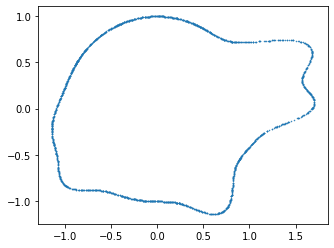

(2, 2000)


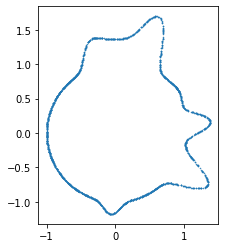

(2, 2000)


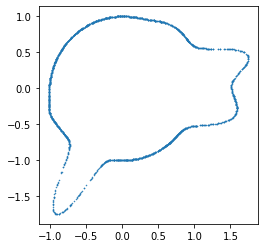

(2, 2000)


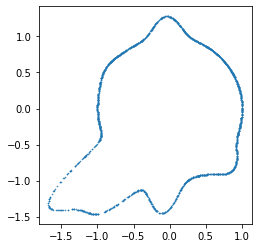

(2, 2000)


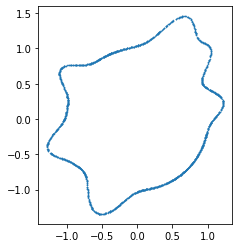

(2, 2000)


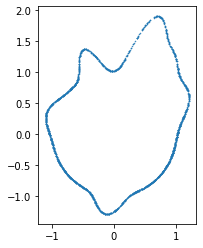

(2, 2000)


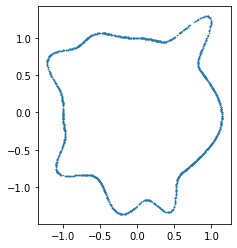

(2, 2000)


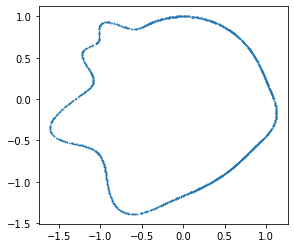

(2, 2000)


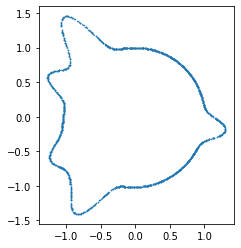

(2, 2000)


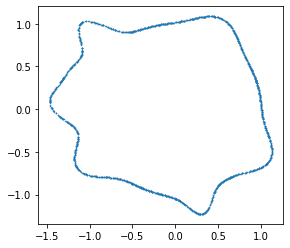

(2, 2000)


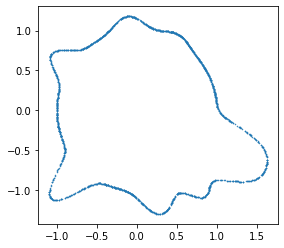

(2, 2000)


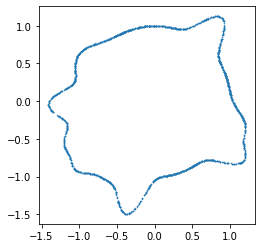

(2, 2000)


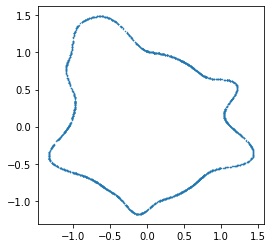

(2, 2000)


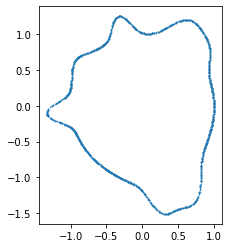

(2, 2000)


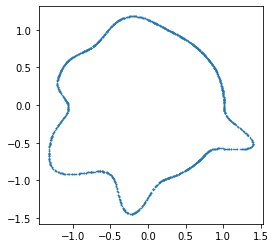

(2, 2000)


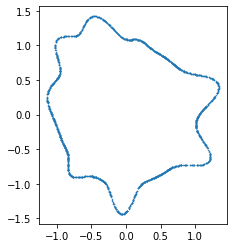

(2, 2000)


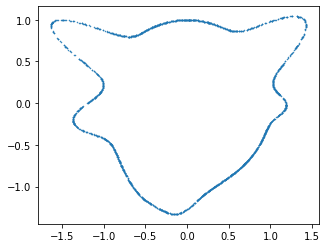

(2, 2000)


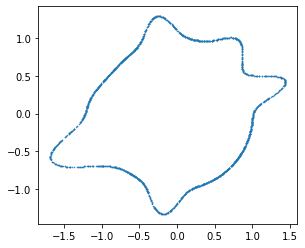

(2, 2000)


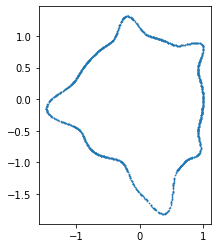

(2, 2000)


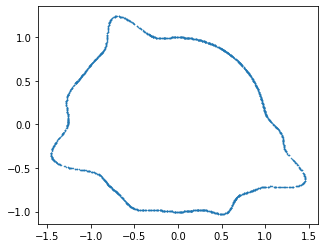

(2, 2000)


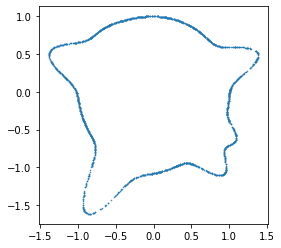

(2, 2000)


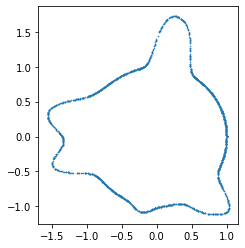

(2, 2000)


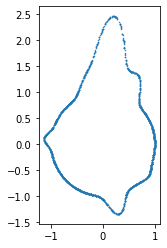

(2, 2000)


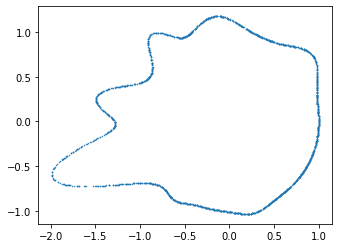

(2, 2000)


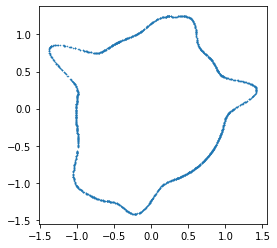

(2, 2000)


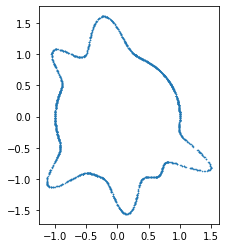

(2, 2000)


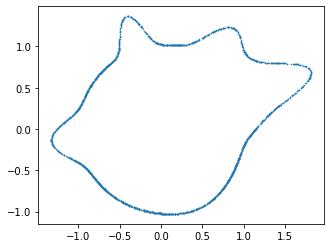

(2, 2000)


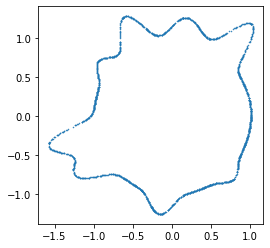

(2, 2000)


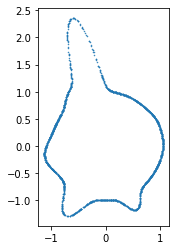

(2, 2000)


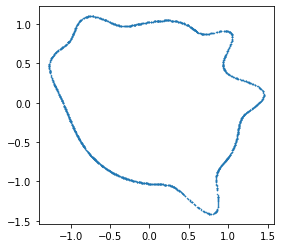

(2, 2000)


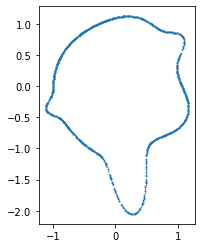

(2, 2000)


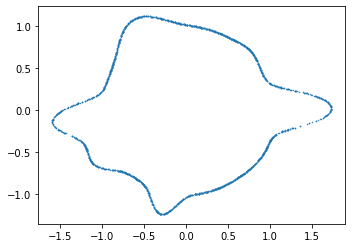

(2, 2000)


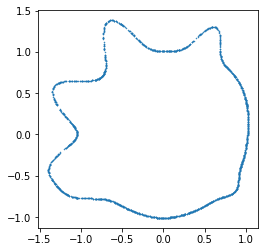

(2, 2000)


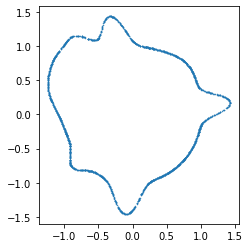

(2, 2000)


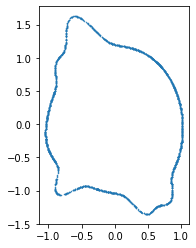

(2, 2000)


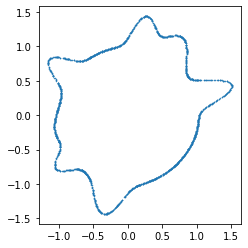

(2, 2000)


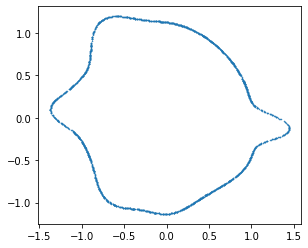

(2, 2000)


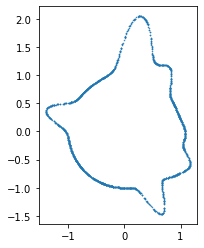

(2, 2000)


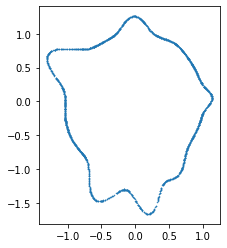

(2, 2000)


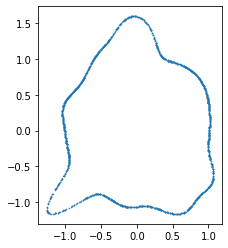

(2, 2000)


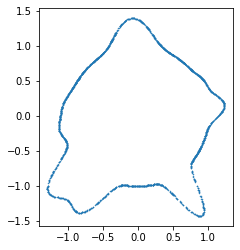

(2, 2000)


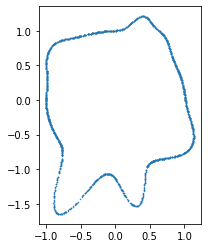

(2, 2000)


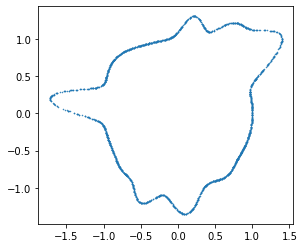

(2, 2000)


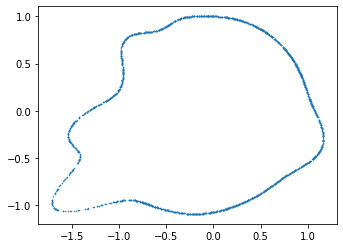

(2, 2000)


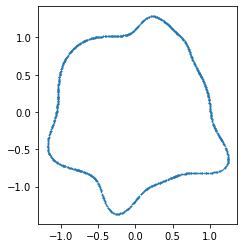

(2, 2000)


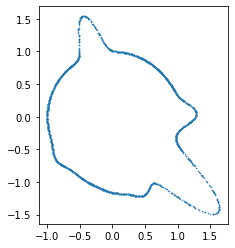

(2, 2000)


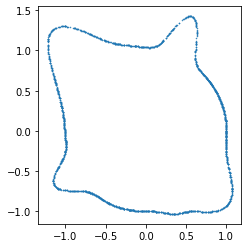

(2, 2000)


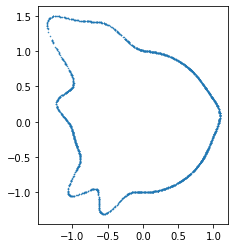

(2, 2000)


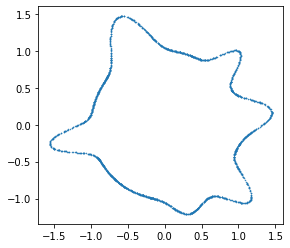

(2, 2000)


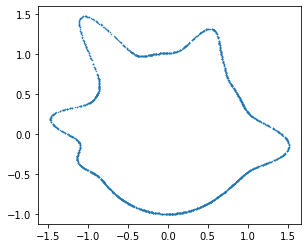

(2, 2000)


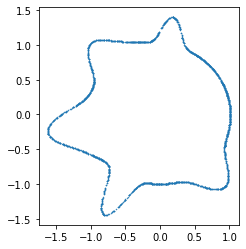

(2, 2000)


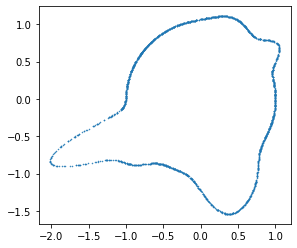

(2, 2000)


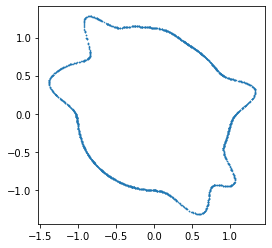

(2, 2000)


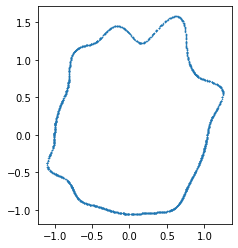

(2, 2000)


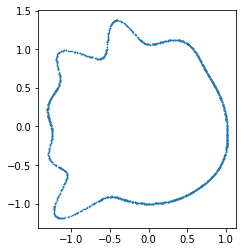

(2, 2000)


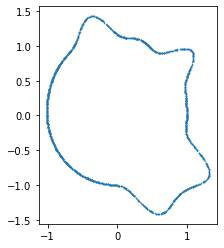

(2, 2000)


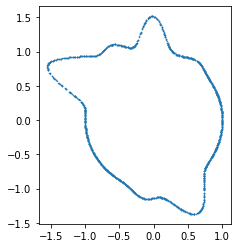

(2, 2000)


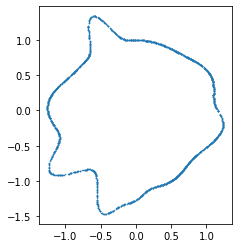

(2, 2000)


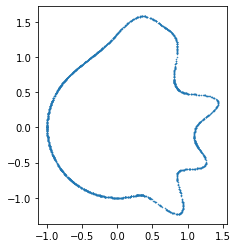

(2, 2000)


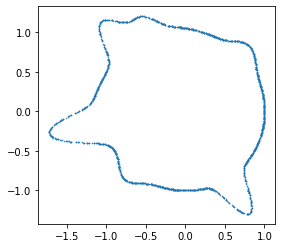

(2, 2000)


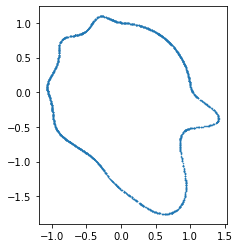

(2, 2000)


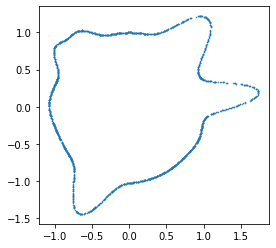

(2, 2000)


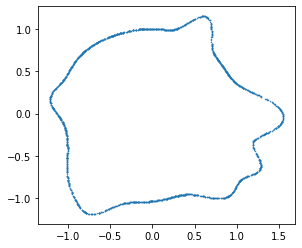

(2, 2000)


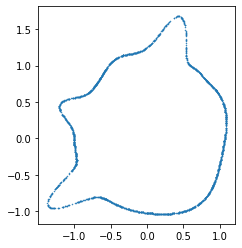

(2, 2000)


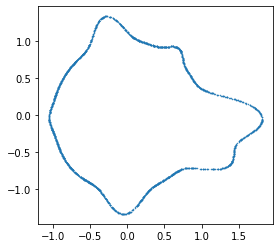

(2, 2000)


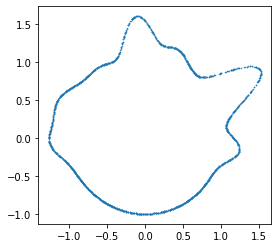

(2, 2000)


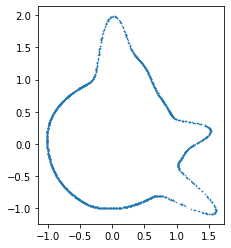

(2, 2000)


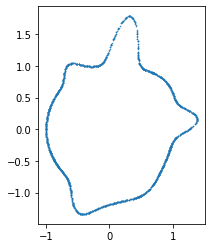

(2, 2000)


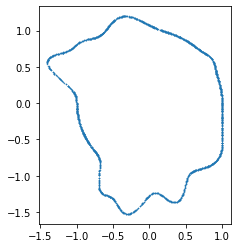

(2, 2000)


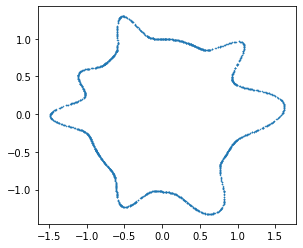

(2, 2000)


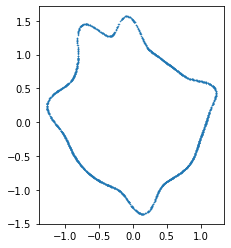

(2, 2000)


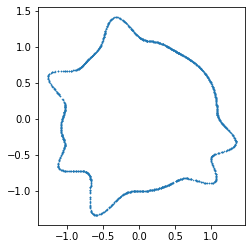

(2, 2000)


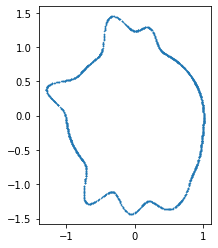

(2, 2000)


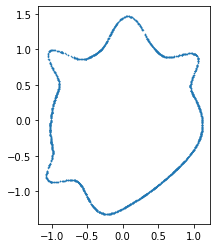

(2, 2000)


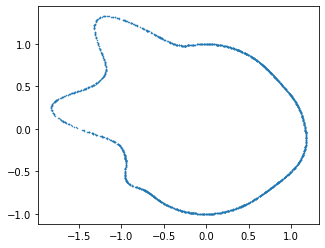

(2, 2000)


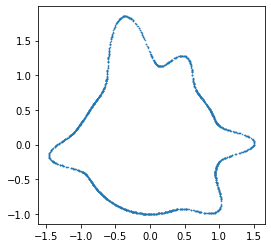

(2, 2000)


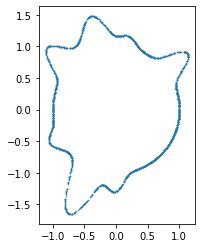

(2, 2000)


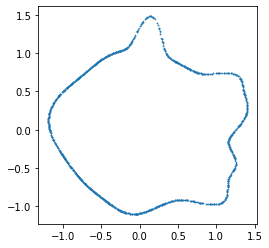

(2, 2000)


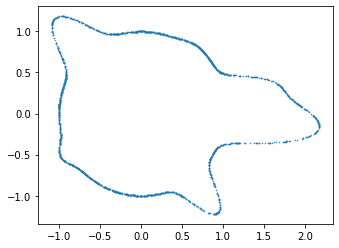

(2, 2000)


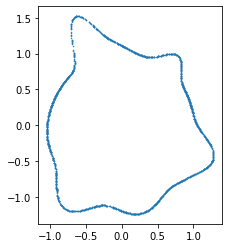

(2, 2000)


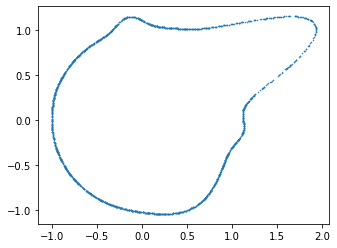

(2, 2000)


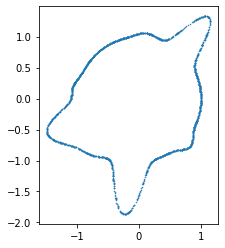

(2, 2000)


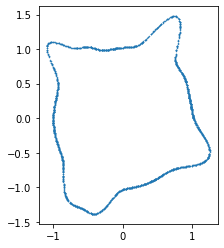

(2, 2000)


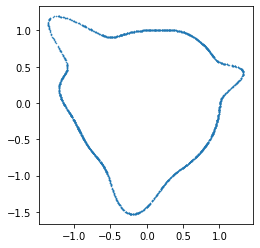

(2, 2000)


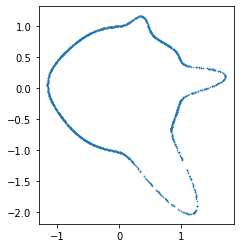

(2, 2000)


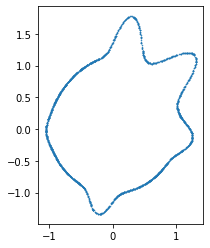

(2, 2000)


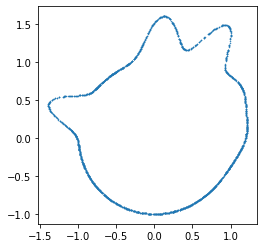

(2, 2000)


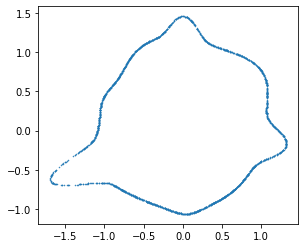

(2, 2000)


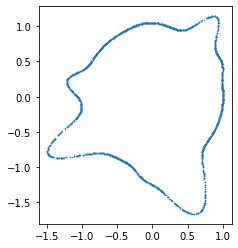

(2, 2000)


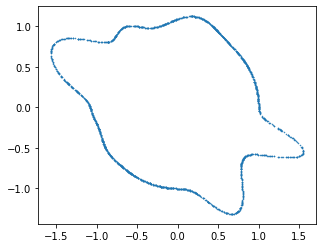

(2, 2000)


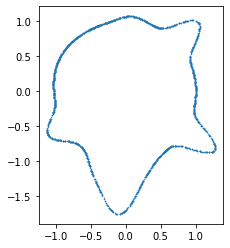

(2, 2000)


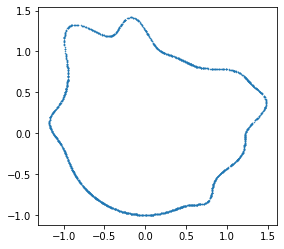

(2, 2000)


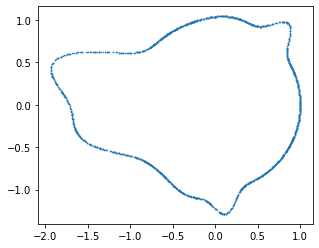

(2, 2000)


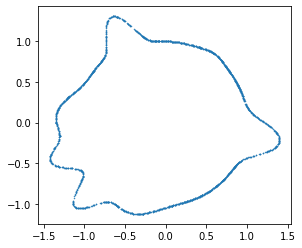

(2, 2000)


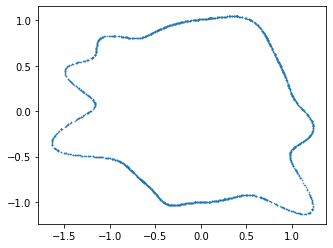

(2, 2000)


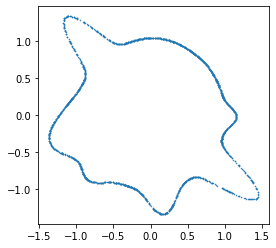

(2, 2000)


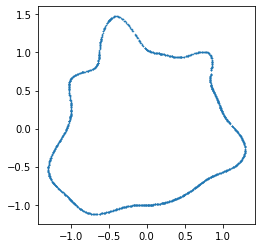

(2, 2000)


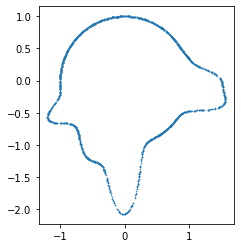

(2, 2000)


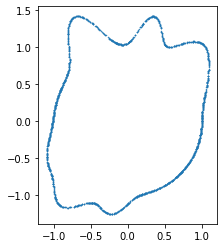

(2, 2000)


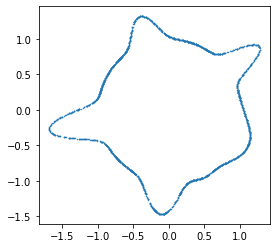

In [10]:
from scipy.special import iv as besseli
import pylab as plt
import numpy as np

def vmf(mu, kappa, x):
    # single point function
    d = mu.shape[0]
    # compute in the log space
    logvmf = (d//2-1) * np.log(kappa) - np.log((2*np.pi)**(d/2)*besseli(d//2-1,kappa)) + kappa * np.dot(mu,x)
    return np.exp(logvmf)

def apply_vmf(x, mu, kappa, norm=1.0):
    delta = 1.0+vmf(mu, kappa, x)
    y = x * np.c_[delta,delta].T
    return y

pltfig = True
numfigs = 2500
numpoints = 2000
dimensions = 2

#dataset = np.zeros(numfigs,dimensions, numpoints)
for k in range(100):
  #plt.clf()
  if pltfig:
    fig = plt.figure()
  w = np.random.rand(11)
  w = w/np.sum(w)
  x = np.random.randn(dimensions,numpoints)
  xnormed = x/np.linalg.norm(x, axis=0)
  xx = xnormed.copy()*w[0]
  it = 10
  for i in range(it):
      kappa = np.random.randint(5, 100)
      mu = np.random.randn(2); mu = mu/np.linalg.norm(mu)
      y = apply_vmf(xnormed, mu, kappa)
      xx += w[i+1]*y
  if pltfig:
    plt.plot(xx[0,:], xx[1,:], '.', ms=1)
    print(xx.shape)
    plt.gca().set_aspect(1)
    plt.show()
    #plt.axis('off')


(2, 2000)


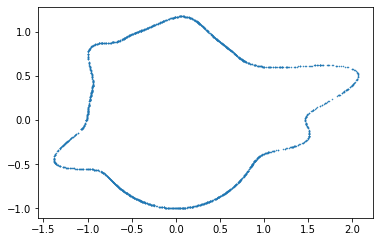

(2, 2000)


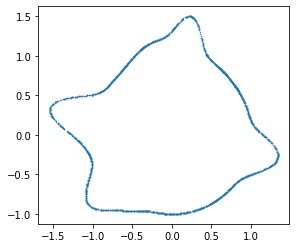

(2, 2000)


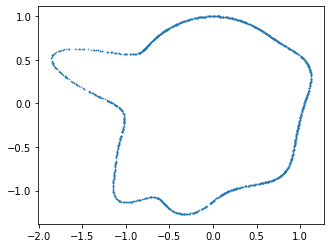

(2, 2000)


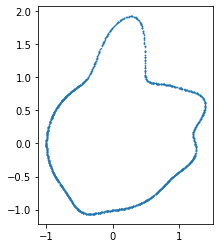

(2, 2000)


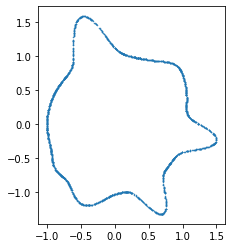

(2, 2000)


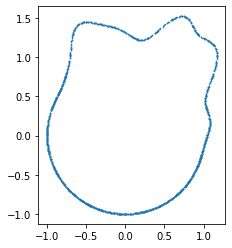

(2, 2000)


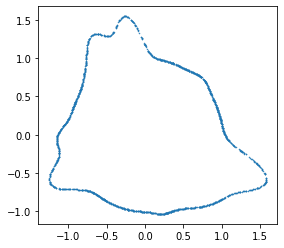

(2, 2000)


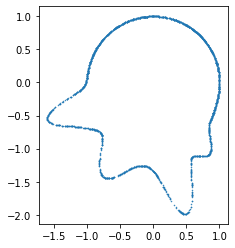

(2, 2000)


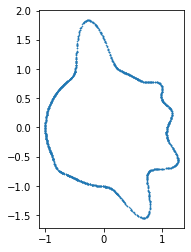

(2, 2000)


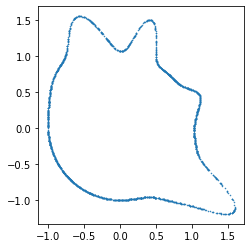

(2, 2000)


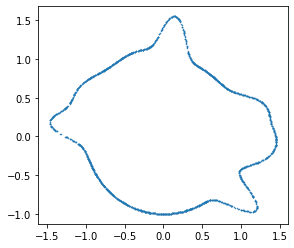

(2, 2000)


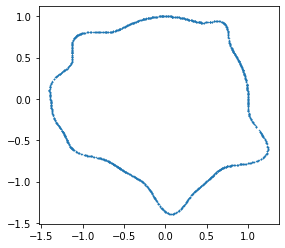

(2, 2000)


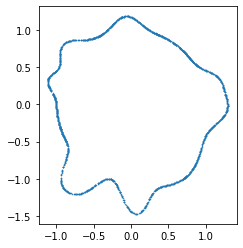

(2, 2000)


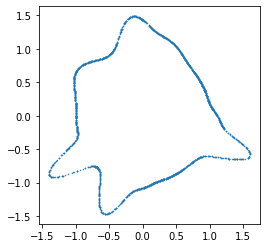

(2, 2000)


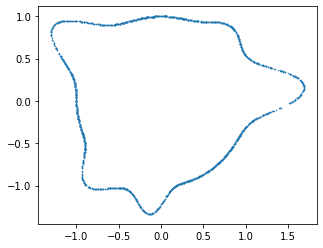

(2, 2000)


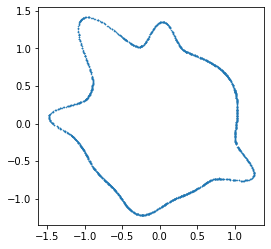

(2, 2000)


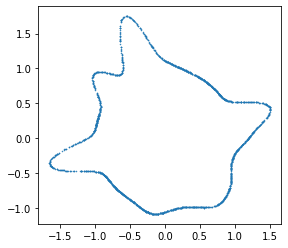

(2, 2000)


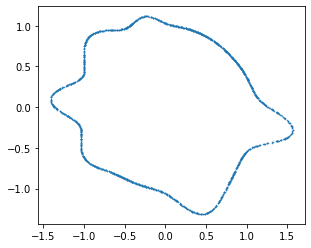

(2, 2000)


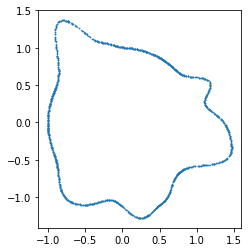

(2, 2000)


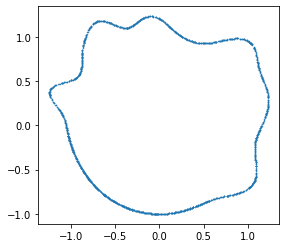

(2, 2000)


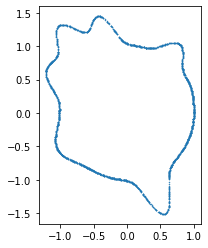

(2, 2000)


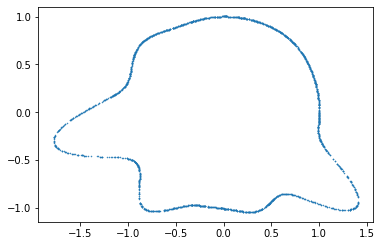

(2, 2000)


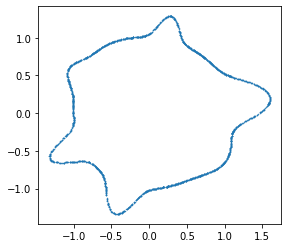

(2, 2000)


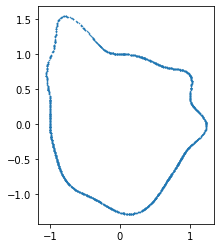

(2, 2000)


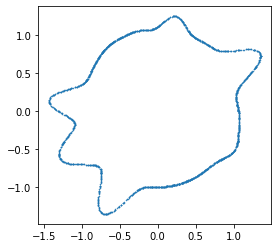

(2, 2000)


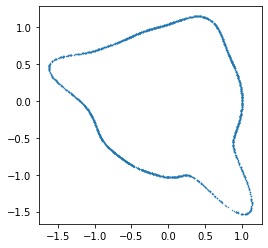

(2, 2000)


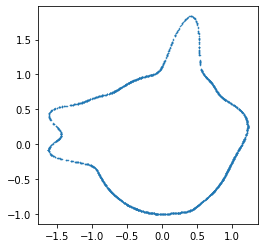

(2, 2000)


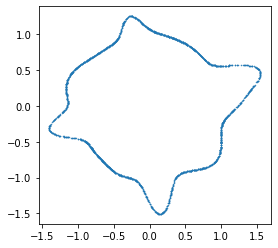

(2, 2000)


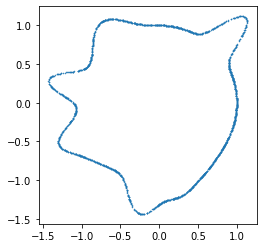

(2, 2000)


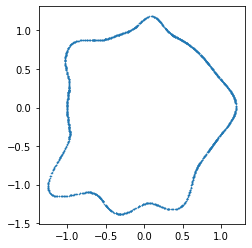

(2, 2000)


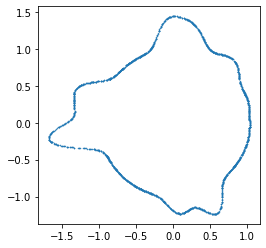

(2, 2000)


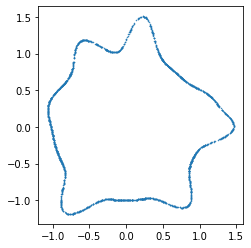

(2, 2000)


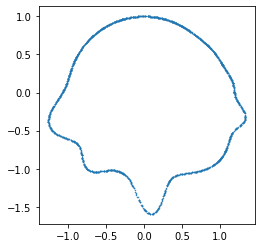

(2, 2000)


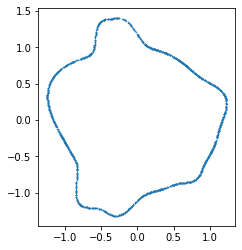

(2, 2000)


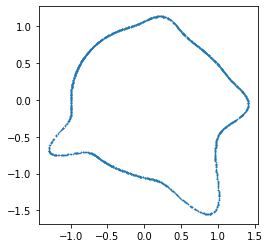

(2, 2000)


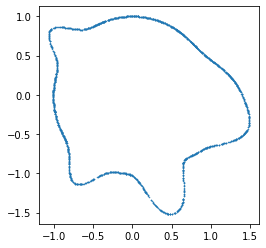

(2, 2000)


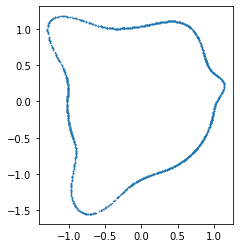

(2, 2000)


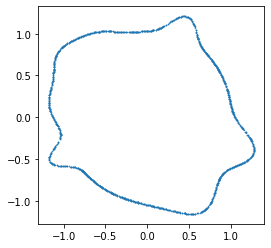

(2, 2000)


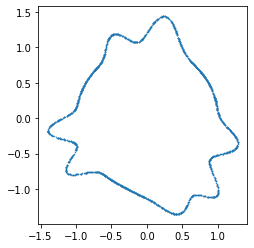

(2, 2000)


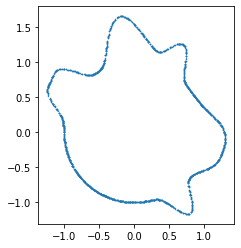

(2, 2000)


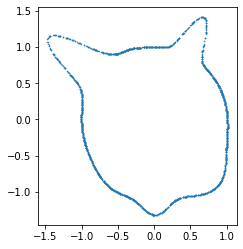

(2, 2000)


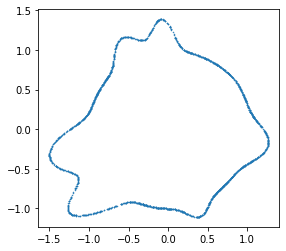

(2, 2000)


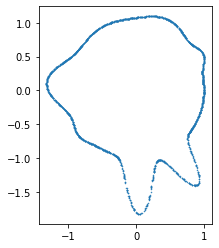

(2, 2000)


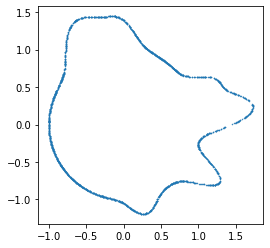

(2, 2000)


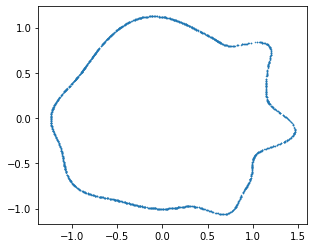

(2, 2000)


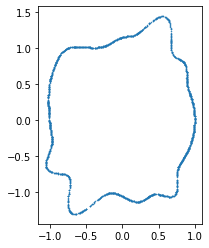

(2, 2000)


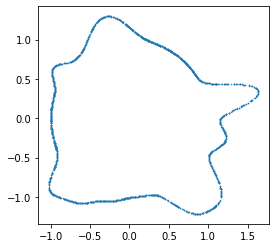

(2, 2000)


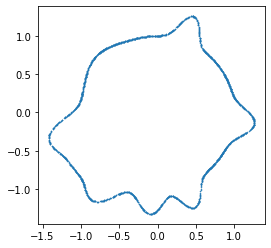

(2, 2000)


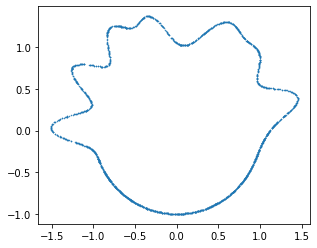

(2, 2000)


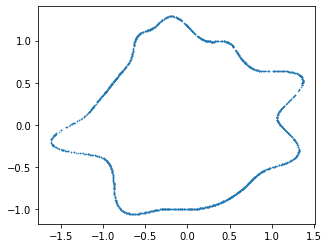

(2, 2000)


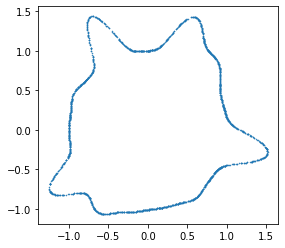

(2, 2000)


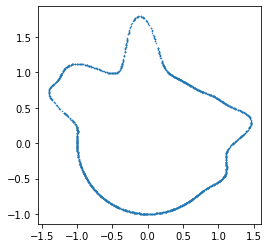

(2, 2000)


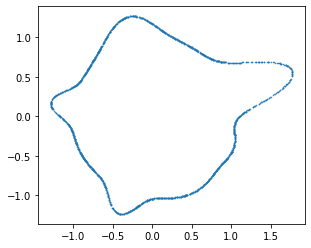

(2, 2000)


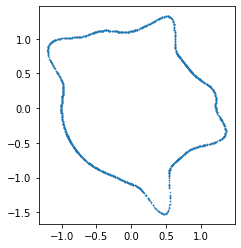

(2, 2000)


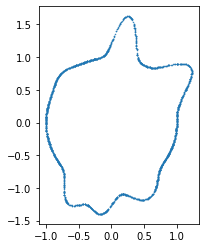

(2, 2000)


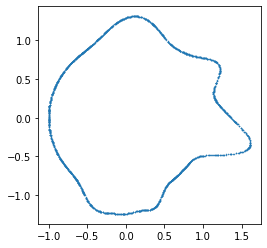

(2, 2000)


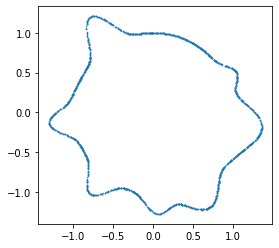

(2, 2000)


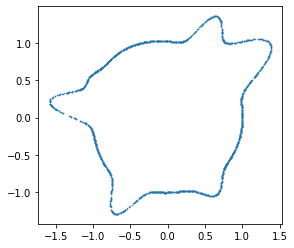

(2, 2000)


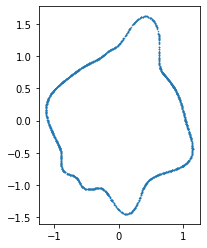

(2, 2000)


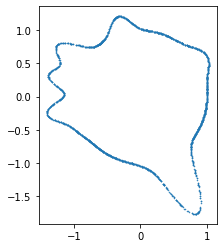

(2, 2000)


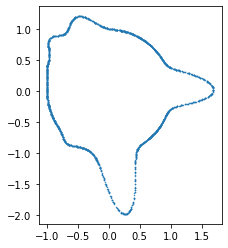

(2, 2000)


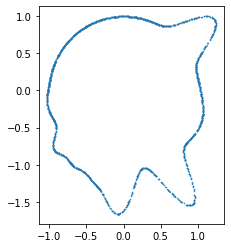

(2, 2000)


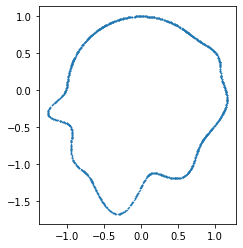

(2, 2000)


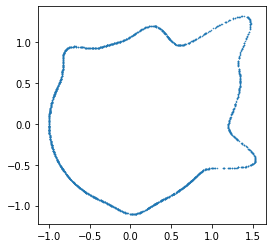

(2, 2000)


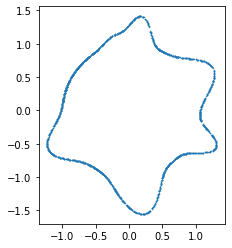

(2, 2000)


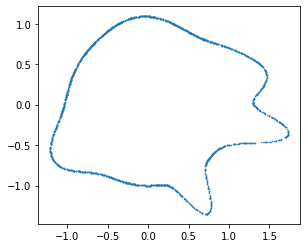

(2, 2000)


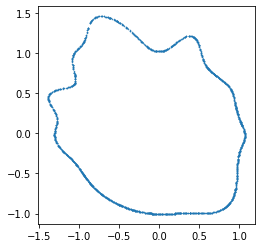

(2, 2000)


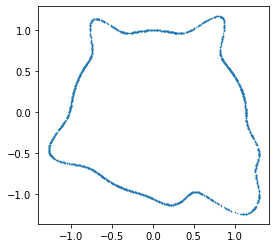

(2, 2000)


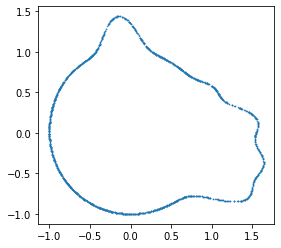

(2, 2000)


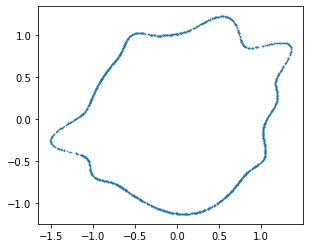

(2, 2000)


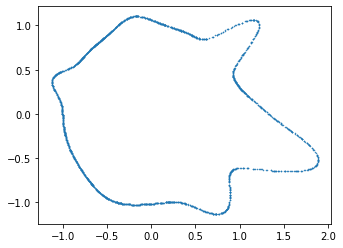

(2, 2000)


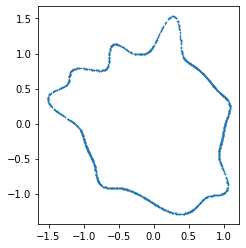

(2, 2000)


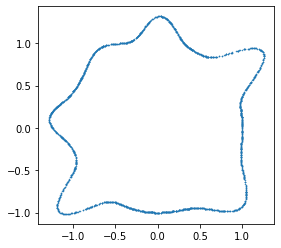

(2, 2000)


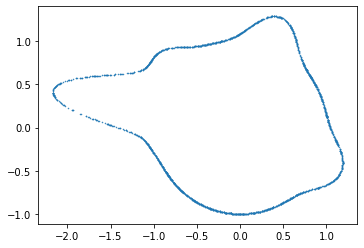

(2, 2000)


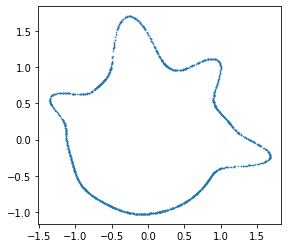

(2, 2000)


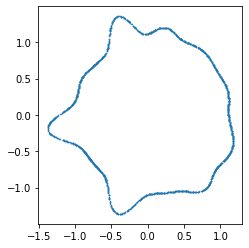

(2, 2000)


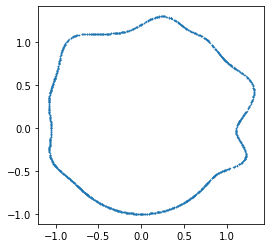

(2, 2000)


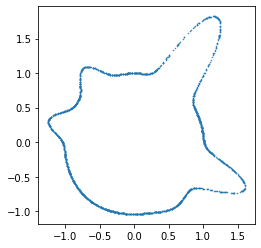

(2, 2000)


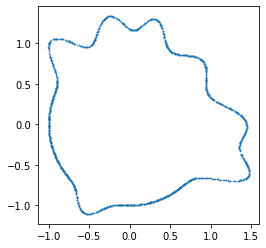

(2, 2000)


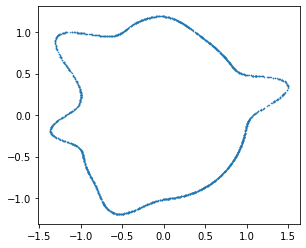

(2, 2000)


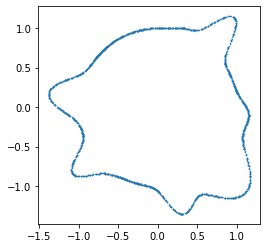

(2, 2000)


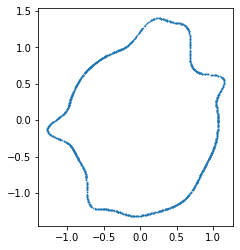

(2, 2000)


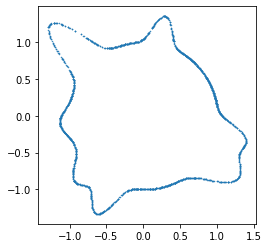

(2, 2000)


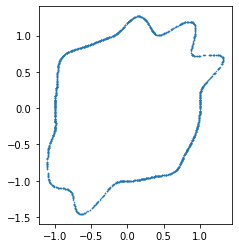

(2, 2000)


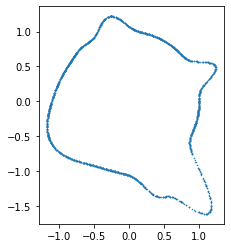

(2, 2000)


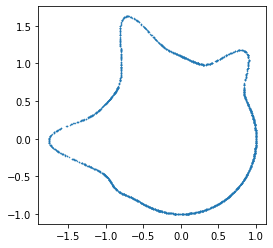

(2, 2000)


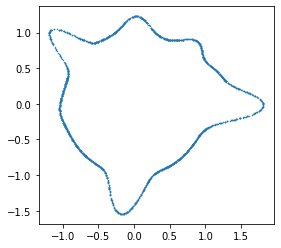

(2, 2000)


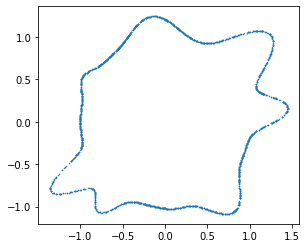

(2, 2000)


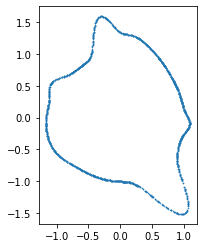

(2, 2000)


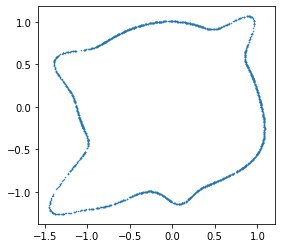

(2, 2000)


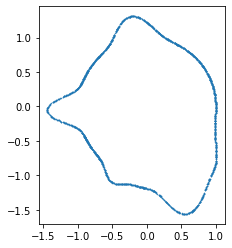

(2, 2000)


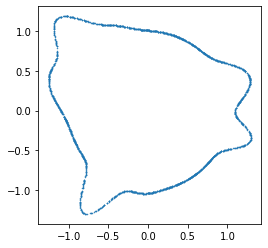

(2, 2000)


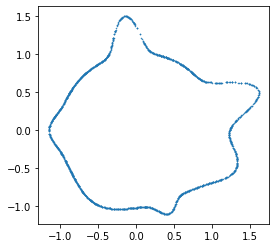

(2, 2000)


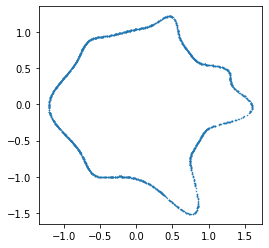

(2, 2000)


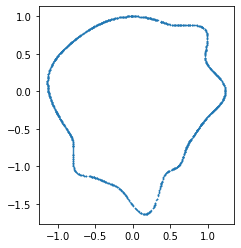

(2, 2000)


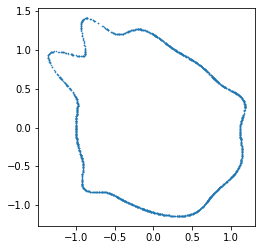

(2, 2000)


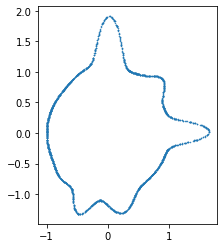

(2, 2000)


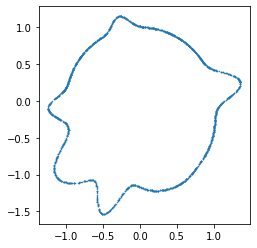

(2, 2000)


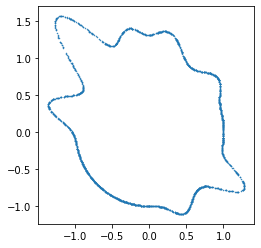

(2, 2000)


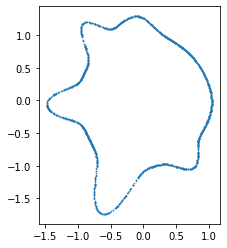

In [11]:
from scipy.special import iv as besseli
import pylab as plt
import numpy as np

def vmf(mu, kappa, x):
    # single point function
    d = mu.shape[0]
    # compute in the log space
    logvmf = (d//2-1) * np.log(kappa) - np.log((2*np.pi)**(d/2)*besseli(d//2-1,kappa)) + kappa * np.dot(mu,x)
    return np.exp(logvmf)

def apply_vmf(x, mu, kappa, norm=1.0):
    delta = 1.0+vmf(mu, kappa, x)
    y = x * np.c_[delta,delta].T
    return y

pltfig = True
numfigs = 100
numpoints = 2000
dimensions = 2

x = np.random.randn(numfigs,dimensions, numpoints)
for k in range(numfigs):
  #plt.clf()
  if pltfig:
    fig = plt.figure()
  w = np.random.rand(11)
  w = w/np.sum(w)
  #x = np.random.randn(dimensions,numpoints)
  xnormed = x[k,:,:]/np.linalg.norm(x[k,:,:], axis=0)
  xx = xnormed.copy()*w[0]
  it = 10
  for i in range(it):
      kappa = np.random.randint(5, 100)
      mu = np.random.randn(2); mu = mu/np.linalg.norm(mu)
      y = apply_vmf(xnormed, mu, kappa)
      xx += w[i+1]*y
  x[k,:,:] = xx
  if pltfig:
    plt.plot(x[k,0,:], x[k,1,:], '.', ms=1)
    print(xx.shape)
    plt.gca().set_aspect(1)
    #plt.axis('off')
    plt.show()


In [17]:
from scipy.special import iv as besseli
import pylab as plt
import numpy as np

def vmf(mu, kappa, x):
    # single point function
    d = mu.shape[0]
    # compute in the log space
    logvmf = (d//2-1) * np.log(kappa) - np.log((2*np.pi)**(d/2)*besseli(d//2-1,kappa)) + kappa * np.dot(mu,x)
    return np.exp(logvmf)

def apply_vmf(x, mu, kappa, norm=1.0):
    delta = 1.0+vmf(mu, kappa, x)
    y = x * np.c_[delta,delta].T
    return y


def createDataset(pltFig = True,numFigs = 100,numPoints = 2000):
  
  dimensions = 2

  x = np.random.randn(numFigs,dimensions, numPoints)
  for k in range(numFigs):
    #plt.clf()
    if pltFig:
      fig = plt.figure()
    w = np.random.rand(11)
    w = w/np.sum(w)
    #x = np.random.randn(dimensions,numpoints)
    xnormed = x[k,:,:]/np.linalg.norm(x[k,:,:], axis=0)
    xx = xnormed.copy()*w[0]
    it = 10
    for i in range(it):
        kappa = np.random.randint(5, 100)
        mu = np.random.randn(2); mu = mu/np.linalg.norm(mu)
        y = apply_vmf(xnormed, mu, kappa)
        xx += w[i+1]*y
    x[k,:,:] = xx
    if pltFig:
      plt.plot(x[k,0,:], x[k,1,:], '.', ms=1)
      print(xx.shape)
      plt.gca().set_aspect(1)
      #plt.axis('off')
      plt.show()

  return x  

x = createDataset(pltFig = False)

In [20]:
print(x.shape)
x[0,0,0]

(100, 2, 2000)


-0.198507381134724